In [1]:
from sklearn.datasets import load_files
import os


In [2]:
PATH = '/home/mikhail/Documents/ML/лекции/mlcourse_open-master/data/imdb_reviews'

In [3]:
!du -hs $PATH

246M	/home/mikhail/Documents/ML/лекции/mlcourse_open-master/data/imdb_reviews


In [4]:
%%time
train_reviews = load_files(os.path.join(PATH, 'train'))

CPU times: user 204 ms, sys: 153 ms, total: 357 ms
Wall time: 360 ms


In [5]:
%%time
test_reviews = load_files(os.path.join(PATH, 'train'))

CPU times: user 202 ms, sys: 124 ms, total: 326 ms
Wall time: 327 ms


In [6]:
len(train_reviews.data)

25000

In [7]:
len(test_reviews.data)

25000

In [8]:
print(train_reviews.data[2])
print('==================================================')
print(train_reviews.data[3])

b'Everyone plays their part pretty well in this "little nice movie". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it\xc2\xb4d be an investment!'
b'There are a lot of highly talented filmmakers/actors in Germany now. None of them are associated with this "movie".<br /><br />Why in the world do producers actually invest money in something like this this? You could have made 10 good films with the budget of this garbage! It\'s not entertaining to have seven grown men running around as dwarfs, pretending to be funny. What IS funny though is that the film\'s producer (who happens to be the oldest guy of the bunch) is playing the YOUNGEST dwarf.<br /><br />The film is filled with moments that scream for captions saying "

In [9]:
# 1 - good
# 2 - bad
print(train_reviews.target[2])
print(train_reviews.target[3])

1
0


In [10]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix

In [11]:
# создание матрицы, заполненной нулями
a = np.zeros([5,5])

In [12]:
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
# заполняем ненулевые элементы матрицы
a[0,3] = 1
a[4,4] = 6
a[2,2] = 5
a[3,1] = 4
a[3,2] = 2
a[1,1] = 7

In [14]:
# распечатываем матрицу как дата-фрейм
pd.DataFrame(a)

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,0.0
3,0.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,6.0


In [15]:
# даём названия колонкам
pd.DataFrame(a, columns=['apple', 'land', 'iris', 'shop', 'sun'])

,apple,land,iris,shop,sun
0,0.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,0.0
3,0.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,6.0


In [16]:
# создаём разреженную матрицу (без нулей). 
# На практике так не делают, т.к. неразреженная матрица 'а' может не поместиться в памяти
b = csr_matrix(a)

In [17]:
b

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [18]:
#  преобразование разреженной матрицы в обычную/
# Может не поместиться в памяти
b.todense()

matrix([[0., 0., 0., 1., 0.],
        [0., 7., 0., 0., 0.],
        [0., 0., 5., 0., 0.],
        [0., 4., 2., 0., 0.],
        [0., 0., 0., 0., 6.]])

In [19]:
# индексы ненулевых элементов (верхнее - индексы строк с нуля, нижнее - столбцов)
b.nonzero()

(array([0, 1, 2, 3, 3, 4], dtype=int32),
 array([3, 1, 2, 1, 2, 4], dtype=int32))

In [20]:
# значения ненулевых элементов
b.data

array([1., 7., 5., 4., 2., 6.])

In [21]:
# достаем все слова из текста. Каждое слово - отдельный признак.
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# получаем разреженную матрицу слов

In [23]:
%%time
cv = CountVectorizer()
X_train_sparce = cv.fit_transform(train_reviews.data)

CPU times: user 3.38 s, sys: 49.2 ms, total: 3.43 s
Wall time: 3.43 s


In [24]:
# смотрим получившийся словарь, состоящий из пар 'слово - его индекс'
cv.vocabulary_

{'zero': 74609,
 'day': 16697,
 'leads': 38088,
 'you': 74324,
 'to': 67125,
 'think': 66526,
 'even': 22718,
 're': 53749,
 'why': 72965,
 'two': 68769,
 'boys': 8714,
 'young': 74334,
 'men': 42153,
 'would': 73714,
 'do': 19326,
 'what': 72703,
 'they': 66474,
 'did': 18292,
 'commit': 13616,
 'mutual': 44618,
 'suicide': 64223,
 'via': 71205,
 'slaughtering': 60766,
 'their': 66367,
 'classmates': 12694,
 'it': 34683,
 'captures': 10582,
 'must': 44560,
 'be': 6334,
 'beyond': 7145,
 'bizarre': 7518,
 'mode': 43375,
 'of': 46680,
 'being': 6663,
 'for': 25450,
 'humans': 32047,
 'who': 72904,
 'have': 30118,
 'decided': 16929,
 'withdraw': 73343,
 'from': 26180,
 'common': 13635,
 'civility': 12582,
 'in': 33004,
 'order': 47196,
 'define': 17169,
 'own': 47889,
 'world': 73651,
 'coupled': 15137,
 'destruction': 17920,
 'br': 8724,
 'is': 34585,
 'not': 46050,
 'perfect': 49221,
 'movie': 44147,
 'but': 9881,
 'given': 27619,
 'money': 43572,
 'time': 66925,
 'the': 66339,
 'filmm

In [67]:
len(cv.vocabulary_)

74849

In [25]:
# преобразуем тестовую выборку
# игнорирует слова, которые появились только в тестовой выборке, а в обучающей их не было
X_test_sparce = cv.transform(test_reviews.data)

In [26]:
# количество слов с тренировочной и тестовой выборках одинаковое
X_train_sparce.shape, X_test_sparce.shape

((25000, 74849), (25000, 74849))

In [27]:
# разреженная матрица размером 75000 отзывов на 124255 уникальных слов
# хранит примерно 10_359_806 элементов (без нулей)
X_train_sparce

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [28]:
# количество элементов с нулями - 9_319_125_000. В памяти они не поместятся.
75000 * 124255

9319125000

In [29]:
# Доля ненулевых элементов - 1 промиль
10359806 / (75000 * 124255)

0.001111671535686022

In [30]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

In [31]:
y_train, y_test = train_reviews.target, test_reviews.target

In [32]:
# смотрим распределение плохих и хороших отзывов в обучающих и тестовых выборках - по 12500. 
# есть также 50000 непомеченных документов для обучения без учителя - упакованы в изначальном архиве
np.bincount(y_train), np.bincount(y_test)

(array([12500, 12500]), array([12500, 12500]))

In [37]:
# обучаем логистическую регрессию
logit = LogisticRegression(solver='lbfgs', random_state=17, n_jobs=-1)
# обучаем стохастический градиентный спуск
# max_iter - максимальное число проходов по всей выборке. Определяется, как 10**6, делённое на размерность выборки
sgd_logit = SGDClassifier(max_iter=40,random_state=17, n_jobs=-1)

In [38]:
10**6/X_train_sparce.shape[0]

40.0

In [40]:
%%time
logit.fit(X_train_sparce, y_train)
# Получим:
# logit.fit(X_train_sparce, y_train)
# /home/mikhail/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
#   " = {}.".format(self.n_jobs))
# Это означает, что оптимизация n_jobs не работает, т.к. по умолчанию стоит solver='liblinear'
# поменяем на 'lbfgs'
# Список всех солверов можно посмотреть так: LogisticRegression?


CPU times: user 147 ms, sys: 68 ms, total: 215 ms
Wall time: 2.53 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
%%time
sgd_logit.fit(X_train_sparce, y_train)

CPU times: user 1.04 s, sys: 11.5 ms, total: 1.06 s
Wall time: 461 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=40, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [43]:
# смотрим аккуратность логистической регрессии
accuracy_score(y_test, logit.predict(X_test_sparce))

0.9822

In [45]:
# смотрим аккуратность стохастического градиентного спуска
accuracy_score(y_test, sgd_logit.predict(X_test_sparce))

0.9172

#### визуализируем коэффициенты

In [52]:
import matplotlib.pyplot as plt

In [56]:
def visualize_coefficients(classifier, feature_names, n_top_features=35):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [57]:
def plot_grid_scores(grid, param_name):
    plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    legend();
    

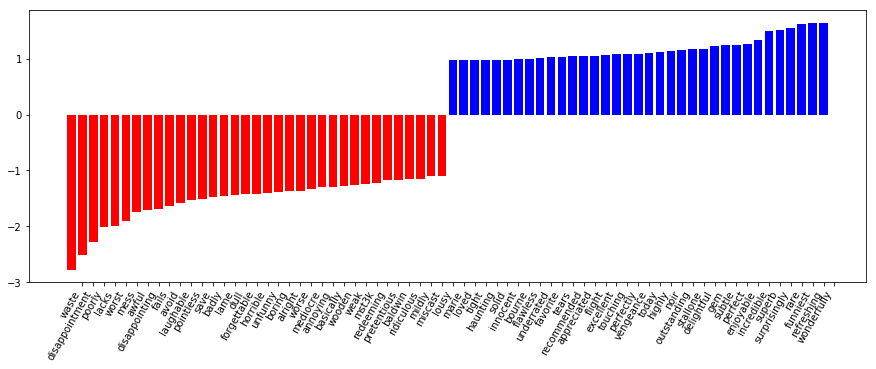

In [58]:
visualize_coefficients(logit, cv.get_feature_names())

#### для увеличения точности моделей (в т.ч. стохастическо градиентного спуска) нужно добавить биграммы в параметры 
биграмма - слово, состоящее из двух слов. Пример биграммы: "хорошая погода".

In [69]:
%%time
cv = CountVectorizer(ngram_range=(1,2))
X_train_sparce = cv.fit_transform(train_reviews.data)
X_test_sparce = cv.transform(test_reviews.data)


CPU times: user 25.3 s, sys: 408 ms, total: 25.7 s
Wall time: 25.7 s


In [70]:
len(cv.vocabulary_)

1513832

In [78]:
cv.vocabulary_

{'zero': 1512013,
 'day': 338102,
 'leads': 750958,
 'you': 1505684,
 'to': 1344321,
 'think': 1323575,
 'even': 433838,
 're': 1060857,
 'why': 1468368,
 'two': 1379425,
 'boys': 195966,
 'young': 1507527,
 'men': 826158,
 'would': 1495529,
 'do': 377248,
 'what': 1452309,
 'they': 1320079,
 'did': 360938,
 'commit': 289039,
 'mutual': 871902,
 'suicide': 1248069,
 'via': 1414989,
 'slaughtering': 1181047,
 'their': 1309193,
 'classmates': 273518,
 'it': 697185,
 'captures': 237559,
 'must': 871029,
 'be': 146209,
 'beyond': 172628,
 'bizarre': 178463,
 'mode': 843072,
 'of': 914447,
 'being': 162100,
 'for': 499356,
 'humans': 638861,
 'who': 1463784,
 'have': 587360,
 'decided': 343363,
 'withdraw': 1483967,
 'from': 517404,
 'common': 289312,
 'civility': 271010,
 'in': 653396,
 'order': 954262,
 'define': 345812,
 'own': 969039,
 'world': 1492678,
 'coupled': 313554,
 'destruction': 355951,
 'br': 196310,
 'is': 686540,
 'not': 900379,
 'perfect': 988774,
 'movie': 858752,
 'but':

In [71]:
X_train_sparce.shape, X_test_sparce.shape

((25000, 1513832), (25000, 1513832))

In [72]:
X_train_sparce

<25000x1513832 sparse matrix of type '<class 'numpy.int64'>'
	with 8765469 stored elements in Compressed Sparse Row format>

In [73]:
sgd_logit_2 = SGDClassifier(max_iter=40,random_state=17, n_jobs=-1)

In [74]:
%%time
sgd_logit_2.fit(X_train_sparce, y_train)

CPU times: user 3.45 s, sys: 27.9 ms, total: 3.47 s
Wall time: 2.86 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=40, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=17, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [76]:
# точность повысилсь с 0,91 до 0,99
accuracy_score(y_test, sgd_logit_2.predict(X_test_sparce))

0.99996